## 라이브러리 설치 및 데이터셋 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [2]:
df.shape

(1000000, 34)

In [3]:
#시각화 관련 한글 깨짐 방지용 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install koreanize-matplotlib

import koreanize_matplotlib

from IPython.display import set_matplotlib_formats
plt.rc('font',family='NanumGothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

# 1번 문제
* 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!


In [4]:
# age_code를 우선 딕셔너리에 저장하고 '연령대코드(5세단위)'를 통해 '연령대' 컬럼 추가하기.

age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

# replace 함수를 활용하는 방법

age = df['연령대코드(5세단위)'].replace(age_code)
df['연령대'] = age
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세


In [5]:
# 연령대별 허리둘레에 대한 기술통계 값을 구하기 위해 pivot_table 형태로 출력

df.pivot_table(index = '연령대', values = '허리둘레', aggfunc = "describe")

,25%,50%,75%,count,max,mean,min,std
연령대,,,,,,,,
20~24세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
25~29세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
30~34세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
35~39세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
40~44세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
50~54세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
60~64세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


min, max 값에 이해가 되지 않는 값들이 존재한다. 그래서, 이상치들을 확인해보고 제거하도록 하자.

In [6]:
df_age_waist = df.copy()               # 전체 데이터는 그대로 두고 이 문제에 대해서만 이상치를 제거하기 위해 데이터 프레임 설정. 

# 우선 허리둘레가 10이 넘지 않는 값들은 제거

df_age_waist[df_age_waist['허리둘레'] < 10]


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대
411306,2017,411307,1,8,41,170.0,75.0,9.2,1.5,1.2,...,2.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세
471952,2017,471953,2,11,47,155.0,45.0,6.5,0.8,0.8,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,50~54세
931073,2017,931074,2,13,48,NaN,NaN,0.0,1.0,1.0,...,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126,60~64세


In [7]:
df_age_waist.drop(411306, inplace=True)
df_age_waist.drop(471952, inplace=True)
df_age_waist.drop(931073, inplace=True)
df_age_waist[df_age_waist['허리둘레'] < 10]


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대


In [8]:
# 허리둘레가 300cm보다 큰 데이터들도 노이즈데이터로 간주하고 제거해준다.

drop_index = df_age_waist[df_age_waist['허리둘레'] > 300].index.tolist()
df_age_waist.drop(drop_index, inplace=True)
df_age_waist[df_age_waist['허리둘레'] > 300]

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대


In [9]:
df_age_waist.pivot_table(index = '연령대', values = '허리둘레', aggfunc = "describe")

# 이상치들이 잘 제거되었음을 확인할 수 있다.

,25%,50%,75%,count,max,mean,min,std
연령대,,,,,,,,
20~24세,67.5,73.4,81.0,23243.0,149.0,75.112473,47.5,10.648424
25~29세,69.0,76.5,84.2,64886.0,150.0,77.534399,48.0,11.096445
30~34세,72.0,80.1,88.0,77480.0,150.0,80.650927,49.0,11.231649
35~39세,75.0,82.0,89.0,84610.0,146.0,81.986505,48.0,10.558380
40~44세,73.0,80.0,87.0,130910.0,165.4,80.474275,42.1,10.189171
45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
50~54세,75.0,81.0,87.0,129832.0,142.0,81.063328,50.8,9.093119
55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
60~64세,77.0,83.0,88.0,106490.0,137.0,82.723546,27.0,8.592478


기술통계 mean값을 확인해보니 연령대가 증가할수록 허리 둘레가 조금씩 증가하는 추세가 보인다. 다만, 75~79세를 정점으로, 그 후에는 다시 수치가 내려감 -> 이는 나이가 들면서 점차 운동량이 줄어들고, 식사도 제대로 못하거나
병에 걸린 노인들이 많아져 그 여파로 허리둘레가 줄은 것은 아닌지 예측해볼 수 있다. 가설을 설정하고 시각화 및 상관을 통해서 확인해보자
#### 가설: 연령대가 증가할수록 허리 둘레도 증가한다.


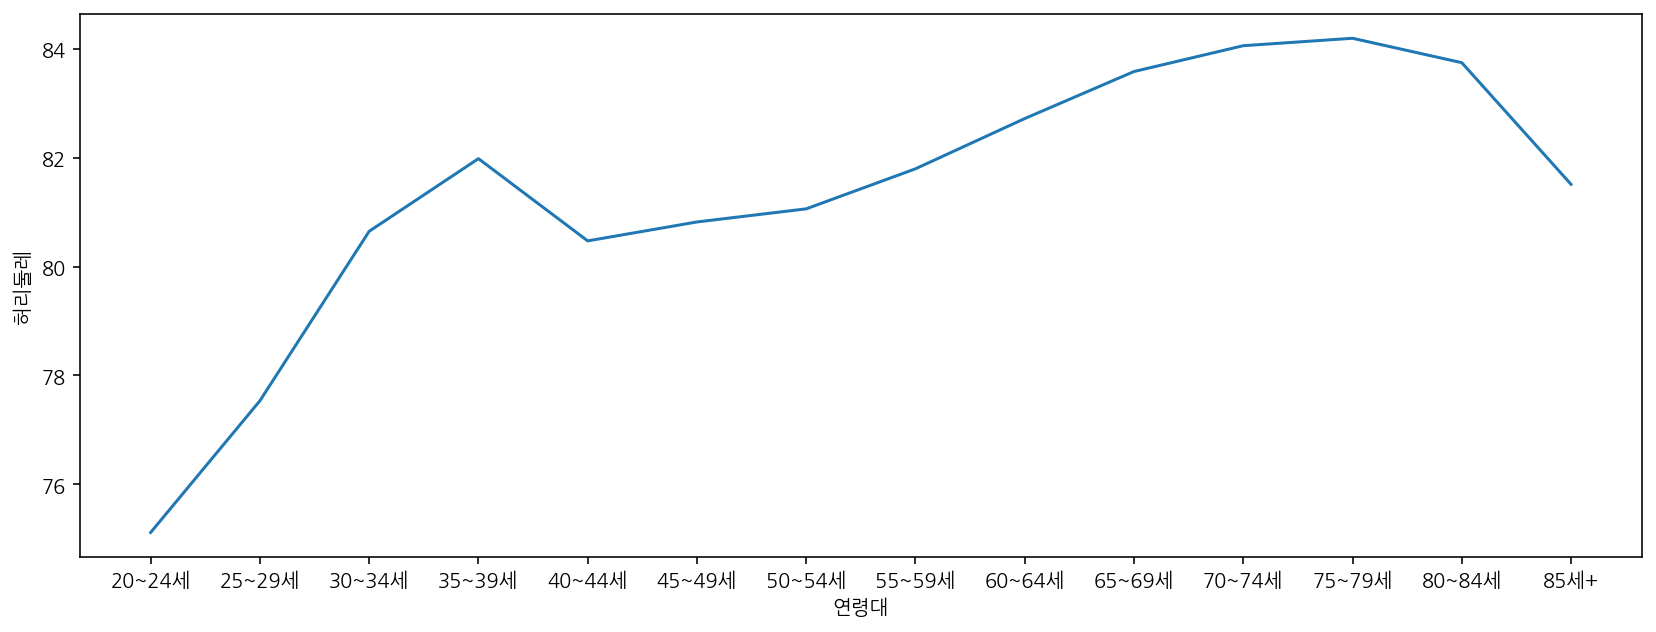

In [10]:
# 시각화하기 전에 연령대 오름차순으로 데이터 정렬하기
df_age_asc = df_age_waist.sort_values('연령대')

# lineplot을 이용하여 연령대별 허리둘레의 변화 시각화
plt.figure(figsize=(14,5))
sns.lineplot(data = df_age_asc, x='연령대', y="허리둘레", ci=None)

In [11]:
age_waist_columns = ['연령대코드(5세단위)', '허리둘레']
df_age_waist = df[age_waist_columns]
df_age_waist.corr()

,연령대코드(5세단위),허리둘레
연령대코드(5세단위),1.000000,0.153971
허리둘레,0.153971,1.000000


허리둘레와 연령대코드의 상관은 0.15 정도로 모호한 정도의 상관이 나타남. 상관으로 가설을 수용하기에는 무리가 있어 보인다.

▶ 따라서, 연령대가 증가할수록 허리둘레도 증가한다는 가설은 보다 검증이 필요하고 온전히 수용하기 어려울 것이다.


# 2번 문제
* "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.


In [12]:
# df 데이터의 컬럼 확인
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자', '연령대'],
      dtype='object')

In [13]:
# columns 변수 안에 상관계수 계산에 사용할 컬럼들 담기
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
# 상관계수 계산을 위한 df_corr 변수 만들기

df_small = df[columns]
df_corr = df_small.corr()

df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.351992,-0.283387,-0.368592
흡연상태,0.351992,1.000000,-0.125770,-0.588476
연령대코드(5세단위),-0.283387,-0.125770,1.000000,0.080177
성별코드,-0.368592,-0.588476,0.080177,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


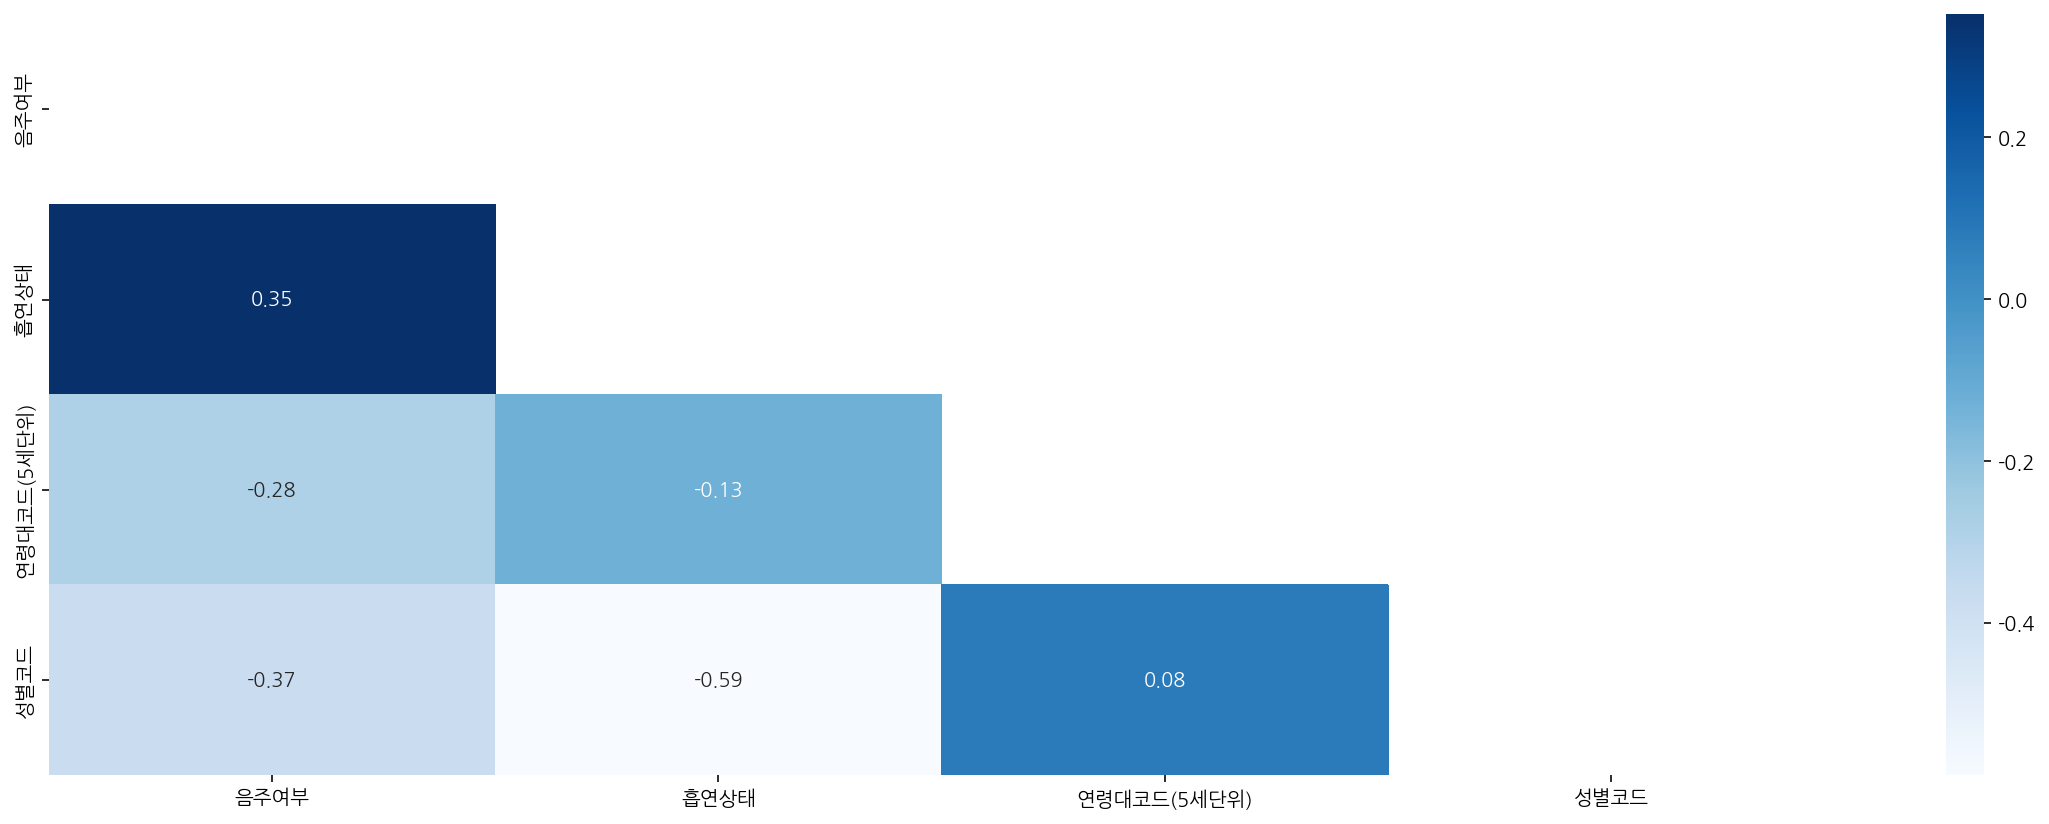

In [14]:
# 매트릭스의 대각선 아래만 나오게 heatmap 그리기
mask = np.triu(np.ones_like(df_corr,dtype=np.bool))

plt.figure(figsize=(20,7))  # heatmap 사이즈 조절
sns.heatmap(df_corr, annot=True,fmt='.2f',cmap='Blues',mask=mask)

* 우선, 성별과 흡연에서 -0.59로 꽤 큰 음의 상관을 보인다. 흡연은 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다). 즉, 수치가 높아질수록 흡연을 한다는 의미. 성별은 1 (남성), 2(여성). 따라서, 흡연과 성별 사이에 음의 상관이 있다는 뜻은 남성일수록 흡연을 더 많이 한다는 의미이다.

* https://www.index.go.kr/unify/idx-info.do?idxCd=4237 실제로 남성이 여성보다 흡연률이 높다는 지표를 확인할 수 있다. 2020년도 기준으로 남성 34%, 여성 6.6% 흡연률을 보이고 있다.

* 흡연과 마찬가지로 음주도 성별과 음의 상관 -0.37을 갖는 것으로 나타난다. 남성이 여성보다 음주도 더 많이 한다는 뜻으로 이해할 수 있다. 아래와 같이 그래프로 시각화한 것을 보면 음주에서 남성들이 두 배 이상의 수치를 보이고 있음



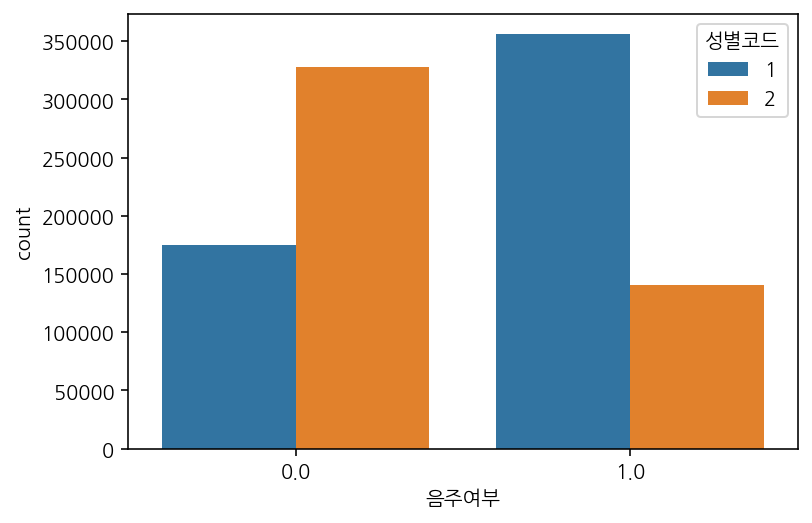

In [15]:
sns.countplot(data=df, x='음주여부', hue='성별코드')

# 3번 문제
### 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

* 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!


In [16]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
# 흡연, 음주 여부를 나타내는 텍스트 형태의 컬럼 추가 

smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df["흡연"] = df['흡연상태'].replace(smoke)
df["음주"] = df['음주여부'].replace(drink)

df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세,흡연중,안마심
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세,흡연안함,안마심
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세,흡연안함,안마심
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세,흡연안함,마심
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연중,안마심


In [19]:
# 크로스탭 기능으로 음주, 흡연 여부에 따른 count
df_smoke_and_drink = pd.crosstab(index=df.음주, columns=df.흡연)
df_smoke_and_drink

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120778,213740,162166
안마심,55330,394445,52845


In [20]:
print(df_smoke_and_drink['흡연중'].sum())            #흡연하는 사람의 수
print(df_smoke_and_drink.loc['마심'].sum())              #음주를 하는 사람의 수

# 음주를 하는 사람 수가 흡연자의 수보다 두 배 이상 많은 것을 확인해 볼 수 있다.

215011
496684


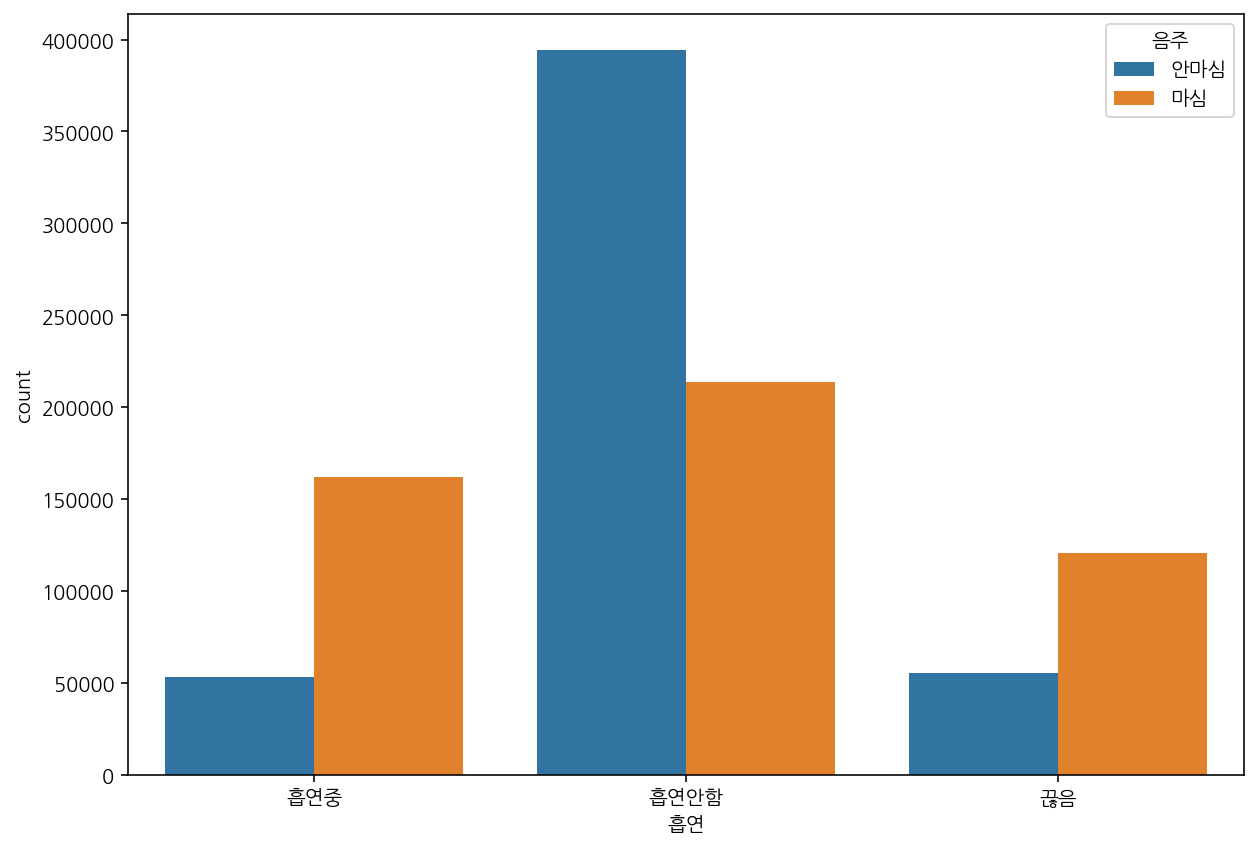

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='흡연', hue='음주')

* 2번에서 상관관계를 구하면서 흡연과 음주의 0.35 정도의 양의 상관을 확인할 수 있었다. 흡연중에서 음주하는 비율이 비음주보다 3배 가량 높게 나타나고, 비흡연에서 음주가 비음주보다 약 2배 정도 낮게 나타난 것을 확인할 수 있음. 즉, 흡연할수록 음주하는 비율도 높아진다.

#### 그렇다면, 흡연+음주하는 사람들의 건강 지표들은 비흡연+비음주에 비해 월등히 안 좋은 수치를 기록할까?

몇 가지 건강지표 몇 개를 통해서 비교해보자

In [23]:
df.columns
# 이 중에서 트리글리세라이드, 감마지티피를 대표적으로 비교해보자.
# 트리글리세라이드는 중성지방을 의미한다. 주로 식사 후 필요치 않은 에너지가 지방으로 전환될 때 혈중 중성지방 농도가 증가.
# 감마지티피는 간, 신장, 췌장, 비장, 심장, 뇌에 분포하는 효소다. 수치가 높을수록 간 건강이 좋지 않음을 의미한다. 

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자', '연령대', '흡연', '음주'],
      dtype='object')

In [24]:
df.pivot_table(index = ['흡연', '음주'], values = ['트리글리세라이드', '감마지티피'])


감마지티피    트리글리세라이드
흡연   음주                        
끊음   마심   52.943215  153.990826
     안마심  33.734342  136.378884
흡연안함 마심   32.891660  114.976087
     안마심  24.742900  116.258643
흡연중  마심   63.455964  175.059767
     안마심  35.471491  150.350132

* 흡연중 + 마심에서 감마지티피, 트리글리세라이드 수치 모두 제일 높게 나옴. 반면, 흡연안함 + 안마심에서 두 수치 모두 제일 낮게 나왔다.
* 역시 음주와 흡연은 지방, 간 관련 수치에서 치명적인 영향을 주는 것으로 볼 수 있다. 

# 4번 문제
### 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

* 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.


#### 예상: 감마지티피는 간에 쌓인 안좋은 물질이다. 음주를 하는 사람이 이 수치가 높을 것이라 예상한다. 체중이 무거운 사람들 대상이므로 총콜레스테롤 수치는 기본적으로 높다고 예상하는데 그 중에서도 음주를 하는 집단이 더 높을 것 같다.



In [25]:
# 데이터 미리보기
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세,흡연중,안마심
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세,흡연안함,안마심
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세,흡연안함,안마심
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세,흡연안함,마심
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연중,안마심


In [26]:
# 결측치를 확인하자.
df.isna().sum()

기준년도                 0
가입자일련번호              0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)          259
체중(5Kg 단위)         264
허리둘레               440
시력(좌)              288
시력(우)              279
청력(좌)              242
청력(우)              243
수축기혈압               76
이완기혈압               77
식전혈당(공복혈당)          43
총콜레스테롤              43
트리글리세라이드            43
HDL콜레스테롤            44
LDL콜레스테롤          2899
혈색소                 56
요단백               4858
혈청크레아티닌             44
(혈청지오티)AST          42
(혈청지오티)ALT          44
감마지티피               45
흡연상태               160
음주여부               525
구강검진 수검여부            0
치아우식증유무         999934
결손치유무           999934
치아마모증유무         999934
제3대구치(사랑니)이상    999934
치석              601221
데이터공개일자              0
연령대                  0
흡연                 160
음주                 525
dtype: int64

상관계수를 구하고자 하는 체중, 총콜레스테롤, 감마지티피 값들에 결측치가 있는 데이터는 삭제하자.



In [29]:
df_del = df.copy()
df_del= df_del.dropna(subset = ['체중(5Kg 단위)', '총콜레스테롤', '감마지티피'])
df_del.isna().sum()

기준년도                 0
가입자일련번호              0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)            2
체중(5Kg 단위)           0
허리둘레               260
시력(좌)              205
시력(우)              196
청력(좌)              172
청력(우)              173
수축기혈압               25
이완기혈압               26
식전혈당(공복혈당)           1
총콜레스테롤               0
트리글리세라이드             0
HDL콜레스테롤             1
LDL콜레스테롤          2856
혈색소                 15
요단백               4780
혈청크레아티닌              2
(혈청지오티)AST           0
(혈청지오티)ALT           2
감마지티피                0
흡연상태               158
음주여부               523
구강검진 수검여부            0
치아우식증유무         999627
결손치유무           999627
치아마모증유무         999627
제3대구치(사랑니)이상    999627
치석              601010
데이터공개일자              0
연령대                  0
흡연                 158
음주                 523
dtype: int64

In [31]:
df_fat = df_del[df_del["체중(5Kg 단위)"]>=120]
df_fat["체중(5Kg 단위)"].unique()

array([120., 155., 140., 130., 125., 165., 145., 135., 150., 170., 180.,
       160., 175.])

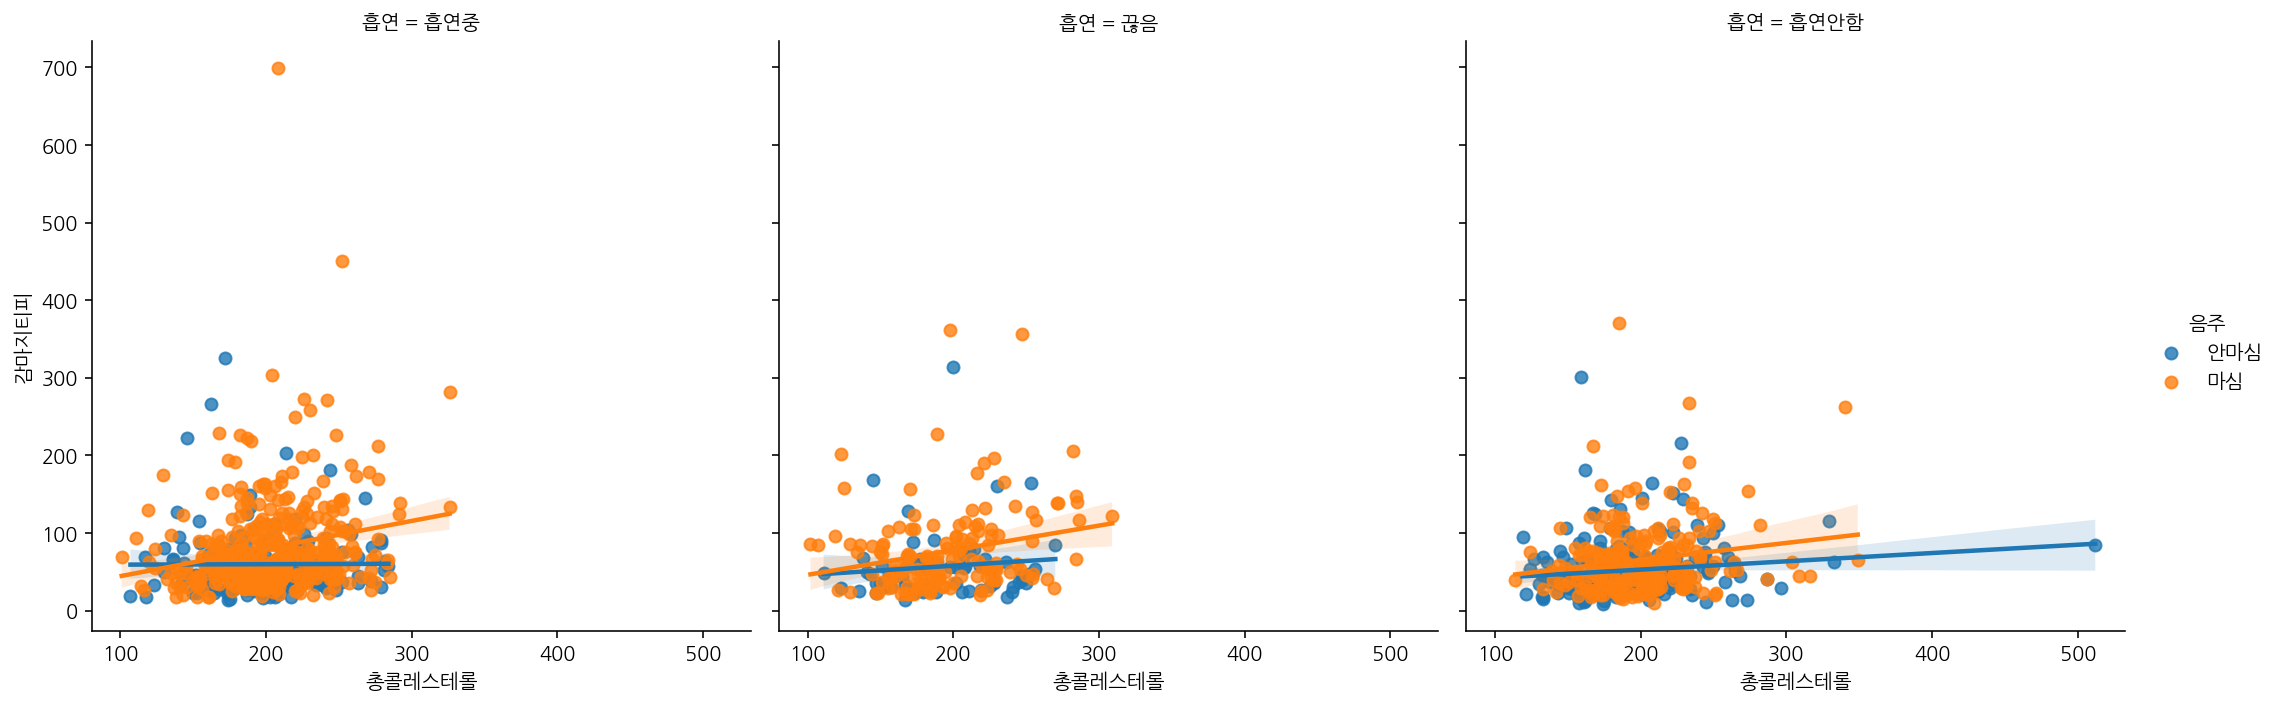

In [35]:
sns.lmplot(data=df_fat, x="총콜레스테롤", y="감마지티피", hue="음주", col="흡연")

In [37]:
# 전체 데이터의 수치 평균과 120kg 이상의 데이터의 수치 비교
df[['총콜레스테롤','감마지티피']].describe()


,총콜레스테롤,감마지티피
count,999891.000000,999889.000000
mean,195.513362,37.235020
std,38.935820,50.606524
min,10.000000,1.000000
25%,169.000000,16.000000
50%,193.000000,23.000000
75%,219.000000,40.000000
max,2245.000000,999.000000


* 총콜레스테롤은 195.5, 감마지티피는 37.2의 전체 평균치를 보이고 있다. 총콜레스테롤은 흡연, 음주 여부에 관계 없이 200을 기준으로 양 옆으로 고르게 분포되어 있는 것을 봤을 때 어느 정도 전체 평균 값에서 크게 벗어나지 않는다고 판단할 수 있겠다. 그러나, 감마지티피는 전체 평균이 37인데 반해 한 눈에 봐도 50을 넘어서는 지표들이 상당히 많은 것을 봐서는 전체 평균보다 확실히 더 높다는 결론을 낼 수 있다. 또한, 전체적인 분포를 봤을 때, 음주를 하는 주황색 점들이 파란점을 덮어서 조금 더 위에 위치하는 것을 봐서 음주가 감마지티피에 영향을 준다고도 볼 수 있겠다. 음주, 흡연, 감마지티피, 총콜레스테롤 간의 상관 관계를 구해서 이들간의 연관성을 파악해보자!



In [38]:
drink_smoke_chol_gamma = ['체중(5Kg 단위)', "음주여부", "흡연상태", "총콜레스테롤", "감마지티피"]
df_drink_smoke_chol_gamma  = df[drink_smoke_chol_gamma]
df_drink_smoke_chol_gamma_corr = df_drink_smoke_chol_gamma.corr()
df_drink_smoke_chol_gamma_corr

,체중(5Kg 단위),음주여부,흡연상태,총콜레스테롤,감마지티피
체중(5Kg 단위),1.000000,0.259918,0.355831,0.062485,0.218263
음주여부,0.259918,1.000000,0.351992,0.021209,0.206308
흡연상태,0.355831,0.351992,1.000000,0.011577,0.242153
총콜레스테롤,0.062485,0.021209,0.011577,1.000000,0.095345
감마지티피,0.218263,0.206308,0.242153,0.095345,1.000000


* 총콜레스테롤은 위의 그래프와 같이 체중, 음주, 흡연과 큰 상관을 보이고 있지 않다. 반면, 감마지티피는 체중, 음주, 흡연 모두와 상관이 나타나고 있다. 음주와 감마지티피는 0.2 의 양의 상관, 체중과 감마지티피는 0.21 양의 상관. 체중과 음주가 거의 비슷하게 감마지티피 수치와 연관이 있다고 볼 수 있다. 흡연과 감마지티피도 0.24로 비슷한 수준이다.

▶ 따라서, 감마지티피 수치를 낮추기 위해서는 금연, 금주, 체중 감량이 필요하다고 볼 수 있다!

# 5번 문제
### 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.
* 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!
*서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)
*시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.


#### 예상: 연령대가 높아질수록 시력은 낮아질 것으로 예상한다. 성별은 큰 차이 없을 것 같다.




In [47]:
# 시력 데이터의 실명 값(9.9)를 제거하는 전처리 과정이 필요함.

df_sight = df[(df['시력(좌)'] != 9.9) & (df['시력(우)'] != 9.9)].copy()
df_sight.describe()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,994121.0,994121.000000,994121.000000,994121.000000,994121.000000,993868.000000,993863.000000,993698.000000,993833.000000,993842.000000,...,994078.000000,993964.000000,993600.000000,994121.000000,0.0,0.0,0.0,0.0,397293.000000,994121.0
mean,2017.0,500014.474030,1.469081,10.524082,33.728356,162.237928,63.424687,81.300717,0.950672,0.948680,...,37.210391,1.606655,0.497973,0.399642,NaN,NaN,NaN,NaN,0.602163,20181126.0
std,0.0,288669.212552,0.499043,2.852915,12.654483,9.394297,12.882039,9.793145,0.342593,0.340886,...,50.527312,0.818038,0.499996,0.489825,NaN,NaN,NaN,NaN,0.590207,0.0
min,2017.0,1.000000,1.000000,5.000000,11.000000,85.000000,20.000000,27.000000,0.100000,0.100000,...,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
25%,2017.0,250027.000000,1.000000,8.000000,27.000000,155.000000,55.000000,74.200000,0.700000,0.700000,...,16.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
50%,2017.0,500019.000000,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,1.000000,1.000000,...,23.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
75%,2017.0,749986.000000,2.000000,13.000000,44.000000,170.000000,70.000000,88.000000,1.200000,1.200000,...,40.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
max,2017.0,1000000.000000,2.000000,18.000000,50.000000,200.000000,180.000000,165.400000,2.500000,2.500000,...,999.000000,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,20181126.0


In [48]:
# 결측치 제거
df_sight = df_sight.dropna(subset = ['시력(좌)', '시력(우)'])
df_sight.isna().sum()


기준년도                 0
가입자일련번호              0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)          170
체중(5Kg 단위)         175
허리둘레               322
시력(좌)                0
시력(우)                0
청력(좌)               85
청력(우)               85
수축기혈압               20
이완기혈압               21
식전혈당(공복혈당)          38
총콜레스테롤              38
트리글리세라이드            38
HDL콜레스테롤            39
LDL콜레스테롤          2876
혈색소                 50
요단백               4690
혈청크레아티닌             39
(혈청지오티)AST          37
(혈청지오티)ALT          39
감마지티피               40
흡연상태               157
음주여부               521
구강검진 수검여부            0
치아우식증유무         993819
결손치유무           993819
치아마모증유무         993819
제3대구치(사랑니)이상    993819
치석              596601
데이터공개일자              0
연령대                  0
흡연                 157
음주                 521
dtype: int64

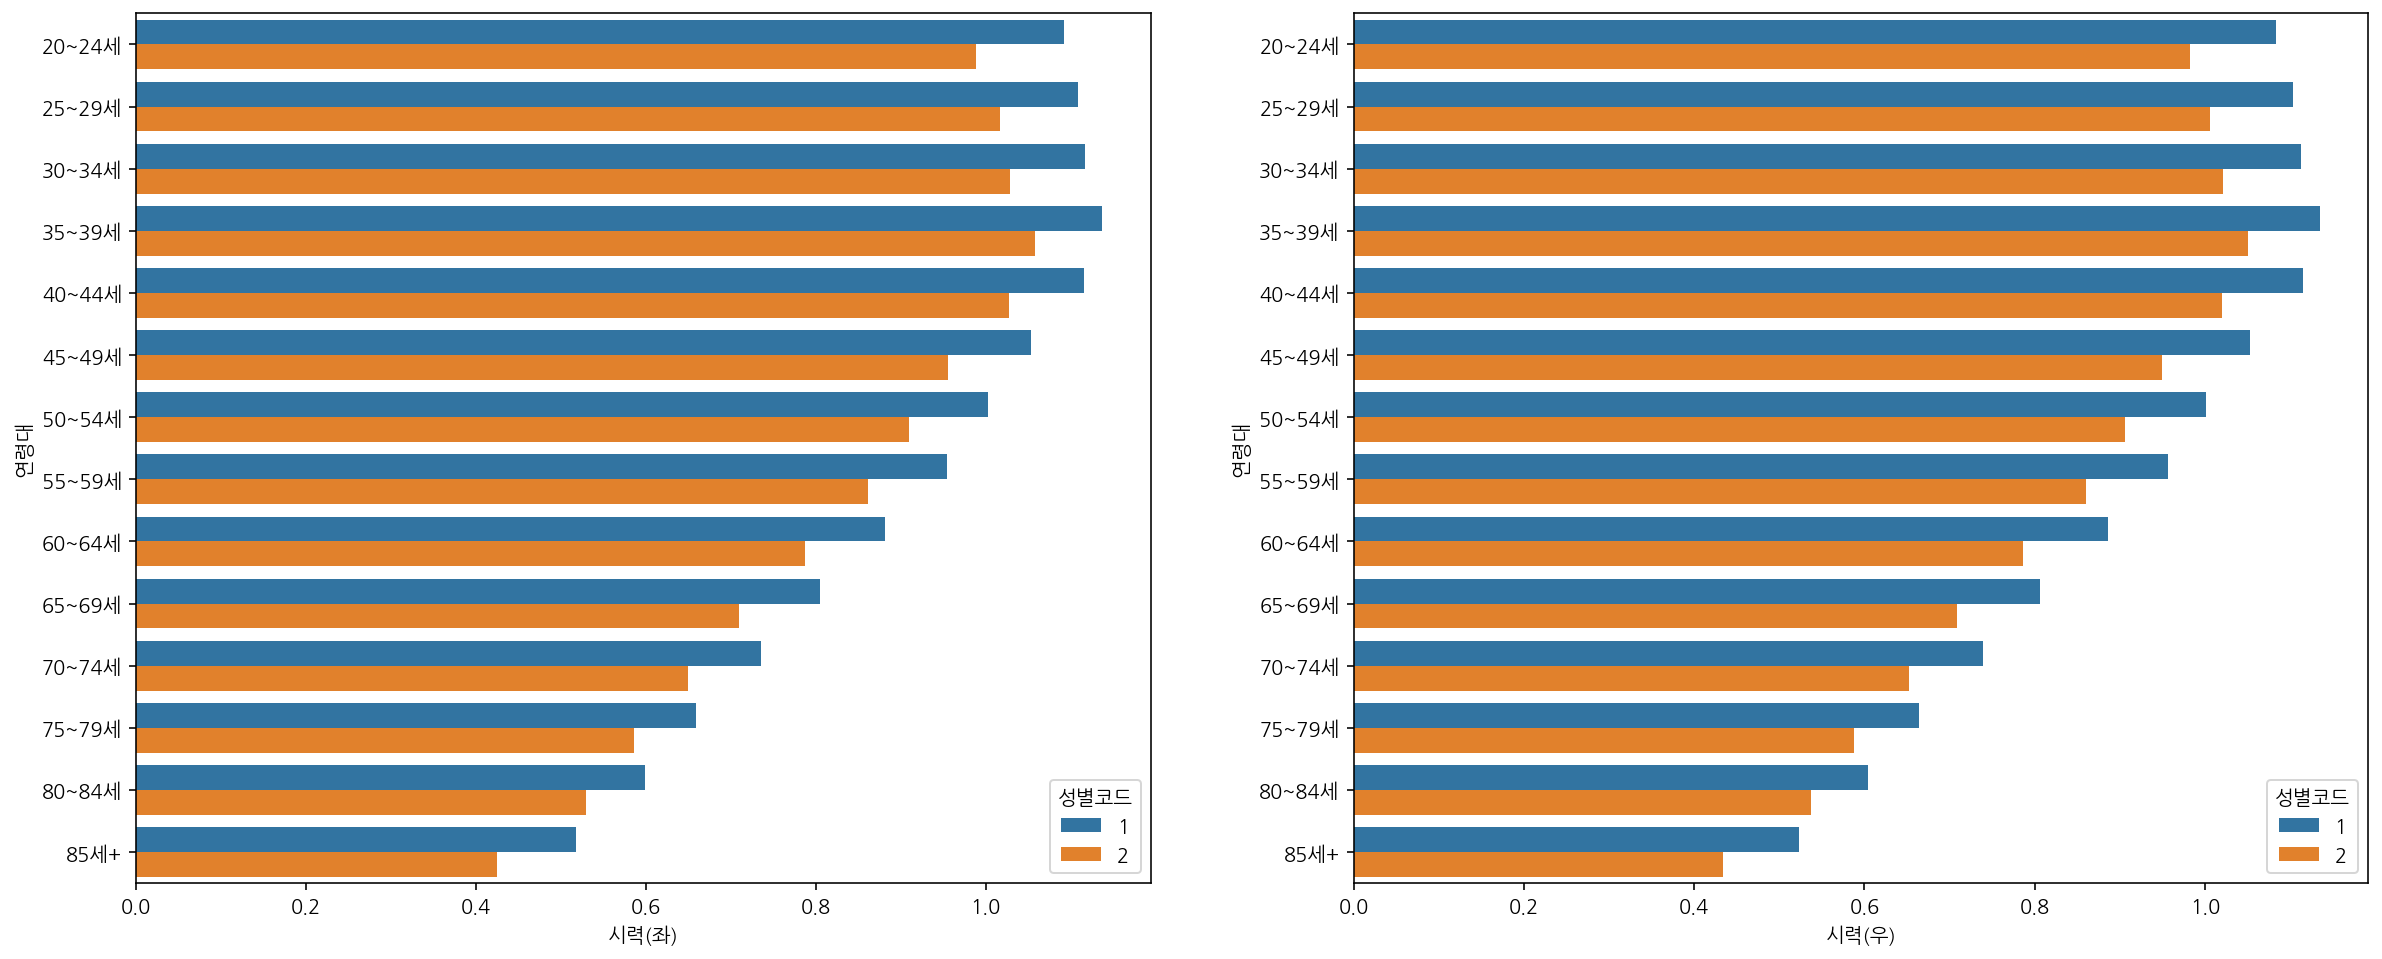

In [50]:
df_sight = df_sight.sort_values('연령대')       # 그래프에서 연령대별 차이를 알기 편하게 연령대로 정렬.

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
sns.barplot(data=df_sight, x= '시력(좌)',  y='연령대', hue='성별코드', ci=None, ax=ax[0])
sns.barplot(data=df_sight, x= '시력(우)',  y='연령대', hue='성별코드', ci=None, ax=ax[1])


* 연령대가 높아질수록 좌, 우 시력 모두 점차 줄어드는 것을 쉽게 확인할 수 있다.
* 가장 놀라웠던 부분은 남성의 시력이 여성보다 모든 연령대에서 좋다는 것이었다. 예상치 못한 흥미로운 결과다.

#### 상관관계를 통해서도 시력과 연령의 차이를 확인해보자


In [51]:
sight_age_sex = ['시력(좌)', '시력(우)', '연령대코드(5세단위)', '성별코드']
df_sight_age_sex = df_sight[sight_age_sex]
df_sight_age_sex_corr = df_sight_age_sex.corr()
df_sight_age_sex_corr

,시력(좌),시력(우),연령대코드(5세단위),성별코드
시력(좌),1.000000,0.725369,-0.387221,-0.168282
시력(우),0.725369,1.000000,-0.379811,-0.174486
연령대코드(5세단위),-0.387221,-0.379811,1.000000,0.080654
성별코드,-0.168282,-0.174486,0.080654,1.000000


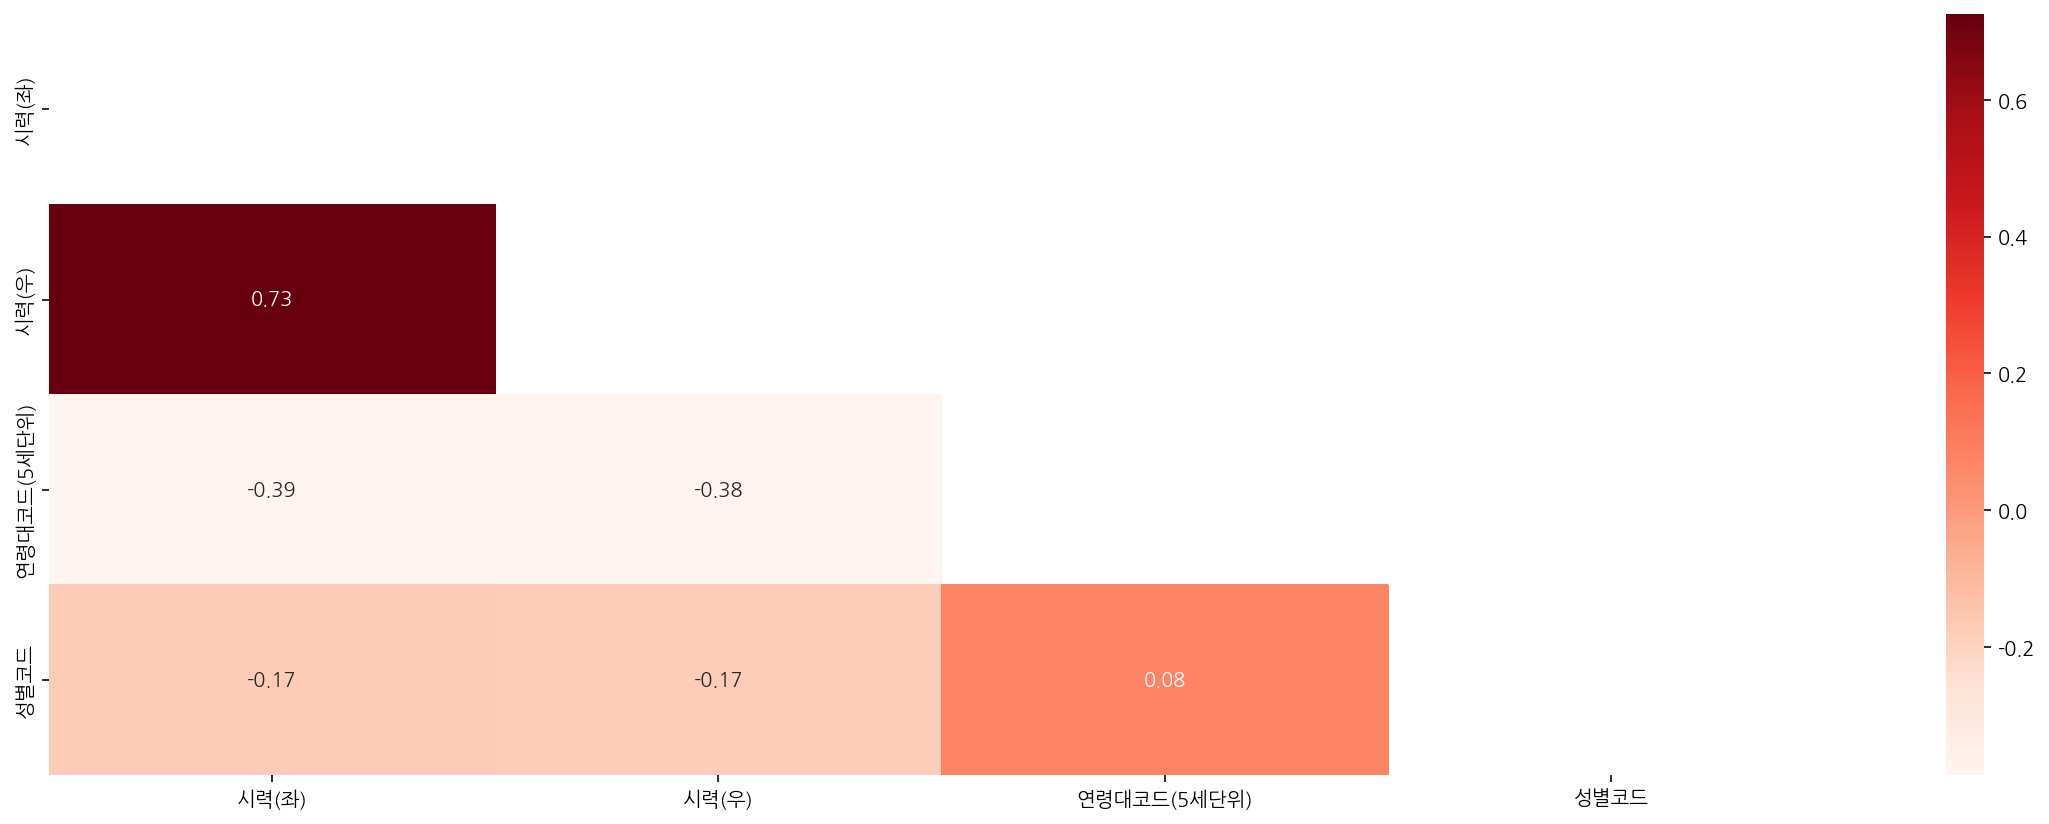

In [53]:
mask = np.triu(np.ones_like(df_sight_age_sex_corr, dtype=bool))
plt.figure(figsize=(20,7))
sns.heatmap(data=df_sight_age_sex_corr, annot=True, fmt=".2f", cmap="Reds", mask=mask)


* 연령대와 시력 간의 -0.39, -0.38 이라는 유의미한 음의 상관이 나타남. 즉, 연령대코드가 높아질수록 시력은 떨어진다는 의미!

* 또한, 남성의 시력이 여성보다 모든 연령대에서 높게 나타난 것도 좌우 모두 -0.17이라는 상관관계를 통해서 크지는 않지만 어느 정도의 상관이 있는 것으로 나타났다.